In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Using Neural Network

In [68]:
df = pd.read_csv('IRIS.csv')

In [69]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [70]:
from sklearn.preprocessing import StandardScaler
df_features = df[['sepal_length','sepal_width','petal_length','petal_width']]
scaler = StandardScaler()
df_features = scaler.fit_transform(X=df_features)

In [71]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
df_targets = df.species.to_numpy().reshape(-1,1)
df_targets = encoder.fit_transform(df_targets)
df_targets = df_targets.toarray()

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,df_targets, test_size=0.33, random_state=42)

In [73]:
# modeling 
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras import backend as K

In [74]:
dimData = X_train.shape[1]
nClasses = y_train.shape[1]
advanced_act = LeakyReLU(alpha=.003)
model_reg = Sequential()
model_reg.add(Dense(10, activation= advanced_act , input_shape=(dimData,)))
model_reg.add(Dense(nClasses, activation='softmax'))


In [75]:
model_reg.weights

[<tf.Variable 'dense_2/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.3265043 ,  0.27195597,  0.19415551, -0.55838704,  0.00540352,
         -0.48120362, -0.58685935,  0.286106  ,  0.6023457 ,  0.31810552],
        [ 0.55761147, -0.19286206, -0.09274882, -0.43941712, -0.25038362,
          0.23671275, -0.32795757, -0.33841753,  0.2961703 , -0.43144947],
        [-0.03039581, -0.04539287,  0.38040733, -0.03567415, -0.1749222 ,
         -0.159219  , -0.33511373, -0.29604122,  0.5205178 ,  0.41683817],
        [-0.27438083,  0.47072506,  0.6227224 ,  0.55105186,  0.14296561,
         -0.13129056,  0.15832591,  0.6074103 , -0.06161755, -0.53106374]],
       dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(10, 3) dtype=float32, numpy=
 array([[ 0.4276545 , -0.14758301,  0.6289623 ],
        [-0.302184  , -0.00212121, -0.15158683],
        [ 0.11

In [76]:
model_reg.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_reg = model_reg.fit(X_train, y_train, batch_size=256, epochs=500, verbose=2,
                        validation_data=(X_test, y_test))

Epoch 1/500
1/1 - 0s - loss: 1.1994 - accuracy: 0.3600 - val_loss: 1.2079 - val_accuracy: 0.3600
Epoch 2/500
1/1 - 0s - loss: 1.1937 - accuracy: 0.3600 - val_loss: 1.2018 - val_accuracy: 0.3600
Epoch 3/500
1/1 - 0s - loss: 1.1880 - accuracy: 0.3600 - val_loss: 1.1958 - val_accuracy: 0.3600
Epoch 4/500
1/1 - 0s - loss: 1.1823 - accuracy: 0.3600 - val_loss: 1.1899 - val_accuracy: 0.3600
Epoch 5/500
1/1 - 0s - loss: 1.1767 - accuracy: 0.3800 - val_loss: 1.1839 - val_accuracy: 0.3800
Epoch 6/500
1/1 - 0s - loss: 1.1711 - accuracy: 0.4000 - val_loss: 1.1780 - val_accuracy: 0.4000
Epoch 7/500
1/1 - 0s - loss: 1.1656 - accuracy: 0.3900 - val_loss: 1.1722 - val_accuracy: 0.4200
Epoch 8/500
1/1 - 0s - loss: 1.1601 - accuracy: 0.4000 - val_loss: 1.1664 - val_accuracy: 0.4200
Epoch 9/500
1/1 - 0s - loss: 1.1546 - accuracy: 0.4000 - val_loss: 1.1606 - val_accuracy: 0.4200
Epoch 10/500
1/1 - 0s - loss: 1.1491 - accuracy: 0.4000 - val_loss: 1.1548 - val_accuracy: 0.4200
Epoch 11/500
1/1 - 0s - loss:

Epoch 85/500
1/1 - 0s - loss: 0.8029 - accuracy: 0.7500 - val_loss: 0.7927 - val_accuracy: 0.6600
Epoch 86/500
1/1 - 0s - loss: 0.7990 - accuracy: 0.7600 - val_loss: 0.7886 - val_accuracy: 0.6800
Epoch 87/500
1/1 - 0s - loss: 0.7952 - accuracy: 0.7600 - val_loss: 0.7846 - val_accuracy: 0.7000
Epoch 88/500
1/1 - 0s - loss: 0.7913 - accuracy: 0.7600 - val_loss: 0.7806 - val_accuracy: 0.7000
Epoch 89/500
1/1 - 0s - loss: 0.7875 - accuracy: 0.7600 - val_loss: 0.7766 - val_accuracy: 0.7000
Epoch 90/500
1/1 - 0s - loss: 0.7837 - accuracy: 0.7800 - val_loss: 0.7727 - val_accuracy: 0.7000
Epoch 91/500
1/1 - 0s - loss: 0.7799 - accuracy: 0.7900 - val_loss: 0.7688 - val_accuracy: 0.7000
Epoch 92/500
1/1 - 0s - loss: 0.7761 - accuracy: 0.7900 - val_loss: 0.7649 - val_accuracy: 0.7000
Epoch 93/500
1/1 - 0s - loss: 0.7724 - accuracy: 0.7900 - val_loss: 0.7610 - val_accuracy: 0.7000
Epoch 94/500
1/1 - 0s - loss: 0.7686 - accuracy: 0.7900 - val_loss: 0.7571 - val_accuracy: 0.7000
Epoch 95/500
1/1 - 0

Epoch 168/500
1/1 - 0s - loss: 0.5542 - accuracy: 0.7900 - val_loss: 0.5373 - val_accuracy: 0.7800
Epoch 169/500
1/1 - 0s - loss: 0.5520 - accuracy: 0.7900 - val_loss: 0.5352 - val_accuracy: 0.7800
Epoch 170/500
1/1 - 0s - loss: 0.5499 - accuracy: 0.7900 - val_loss: 0.5330 - val_accuracy: 0.7800
Epoch 171/500
1/1 - 0s - loss: 0.5478 - accuracy: 0.7900 - val_loss: 0.5309 - val_accuracy: 0.7800
Epoch 172/500
1/1 - 0s - loss: 0.5457 - accuracy: 0.7900 - val_loss: 0.5288 - val_accuracy: 0.7800
Epoch 173/500
1/1 - 0s - loss: 0.5436 - accuracy: 0.7900 - val_loss: 0.5267 - val_accuracy: 0.7800
Epoch 174/500
1/1 - 0s - loss: 0.5415 - accuracy: 0.8000 - val_loss: 0.5247 - val_accuracy: 0.7800
Epoch 175/500
1/1 - 0s - loss: 0.5395 - accuracy: 0.8000 - val_loss: 0.5226 - val_accuracy: 0.7800
Epoch 176/500
1/1 - 0s - loss: 0.5374 - accuracy: 0.8000 - val_loss: 0.5206 - val_accuracy: 0.7800
Epoch 177/500
1/1 - 0s - loss: 0.5354 - accuracy: 0.8000 - val_loss: 0.5186 - val_accuracy: 0.7800
Epoch 178/

Epoch 251/500
1/1 - 0s - loss: 0.4185 - accuracy: 0.8600 - val_loss: 0.4029 - val_accuracy: 0.8200
Epoch 252/500
1/1 - 0s - loss: 0.4173 - accuracy: 0.8600 - val_loss: 0.4017 - val_accuracy: 0.8200
Epoch 253/500
1/1 - 0s - loss: 0.4161 - accuracy: 0.8600 - val_loss: 0.4005 - val_accuracy: 0.8200
Epoch 254/500
1/1 - 0s - loss: 0.4149 - accuracy: 0.8600 - val_loss: 0.3993 - val_accuracy: 0.8200
Epoch 255/500
1/1 - 0s - loss: 0.4136 - accuracy: 0.8600 - val_loss: 0.3981 - val_accuracy: 0.8200
Epoch 256/500
1/1 - 0s - loss: 0.4124 - accuracy: 0.8600 - val_loss: 0.3969 - val_accuracy: 0.8200
Epoch 257/500
1/1 - 0s - loss: 0.4112 - accuracy: 0.8600 - val_loss: 0.3957 - val_accuracy: 0.8200
Epoch 258/500
1/1 - 0s - loss: 0.4101 - accuracy: 0.8600 - val_loss: 0.3945 - val_accuracy: 0.8200
Epoch 259/500
1/1 - 0s - loss: 0.4089 - accuracy: 0.8600 - val_loss: 0.3934 - val_accuracy: 0.8200
Epoch 260/500
1/1 - 0s - loss: 0.4077 - accuracy: 0.8600 - val_loss: 0.3922 - val_accuracy: 0.8200
Epoch 261/

Epoch 334/500
1/1 - 0s - loss: 0.3357 - accuracy: 0.9100 - val_loss: 0.3202 - val_accuracy: 0.9000
Epoch 335/500
1/1 - 0s - loss: 0.3349 - accuracy: 0.9100 - val_loss: 0.3194 - val_accuracy: 0.9000
Epoch 336/500
1/1 - 0s - loss: 0.3341 - accuracy: 0.9100 - val_loss: 0.3186 - val_accuracy: 0.9000
Epoch 337/500
1/1 - 0s - loss: 0.3333 - accuracy: 0.9100 - val_loss: 0.3178 - val_accuracy: 0.9000
Epoch 338/500
1/1 - 0s - loss: 0.3325 - accuracy: 0.9100 - val_loss: 0.3170 - val_accuracy: 0.9000
Epoch 339/500
1/1 - 0s - loss: 0.3317 - accuracy: 0.9100 - val_loss: 0.3162 - val_accuracy: 0.9000
Epoch 340/500
1/1 - 0s - loss: 0.3309 - accuracy: 0.9100 - val_loss: 0.3154 - val_accuracy: 0.9000
Epoch 341/500
1/1 - 0s - loss: 0.3301 - accuracy: 0.9100 - val_loss: 0.3146 - val_accuracy: 0.9000
Epoch 342/500
1/1 - 0s - loss: 0.3293 - accuracy: 0.9100 - val_loss: 0.3138 - val_accuracy: 0.9200
Epoch 343/500
1/1 - 0s - loss: 0.3285 - accuracy: 0.9100 - val_loss: 0.3130 - val_accuracy: 0.9200
Epoch 344/

Epoch 417/500
1/1 - 0s - loss: 0.2781 - accuracy: 0.9200 - val_loss: 0.2616 - val_accuracy: 0.9200
Epoch 418/500
1/1 - 0s - loss: 0.2775 - accuracy: 0.9200 - val_loss: 0.2609 - val_accuracy: 0.9200
Epoch 419/500
1/1 - 0s - loss: 0.2769 - accuracy: 0.9200 - val_loss: 0.2603 - val_accuracy: 0.9200
Epoch 420/500
1/1 - 0s - loss: 0.2763 - accuracy: 0.9200 - val_loss: 0.2597 - val_accuracy: 0.9200
Epoch 421/500
1/1 - 0s - loss: 0.2757 - accuracy: 0.9200 - val_loss: 0.2591 - val_accuracy: 0.9200
Epoch 422/500
1/1 - 0s - loss: 0.2751 - accuracy: 0.9200 - val_loss: 0.2585 - val_accuracy: 0.9200
Epoch 423/500
1/1 - 0s - loss: 0.2746 - accuracy: 0.9200 - val_loss: 0.2579 - val_accuracy: 0.9200
Epoch 424/500
1/1 - 0s - loss: 0.2740 - accuracy: 0.9200 - val_loss: 0.2573 - val_accuracy: 0.9200
Epoch 425/500
1/1 - 0s - loss: 0.2734 - accuracy: 0.9200 - val_loss: 0.2567 - val_accuracy: 0.9200
Epoch 426/500
1/1 - 0s - loss: 0.2728 - accuracy: 0.9200 - val_loss: 0.2561 - val_accuracy: 0.9200
Epoch 427/

Epoch 500/500
1/1 - 0s - loss: 0.2341 - accuracy: 0.9300 - val_loss: 0.2156 - val_accuracy: 0.9600


Text(0.5, 1.0, 'Loss Curves')

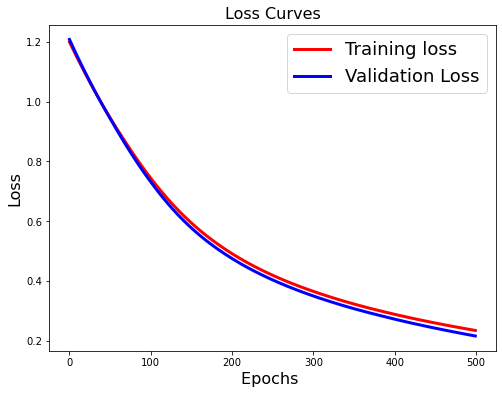

In [77]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(mlp_reg.history['loss'],'r',linewidth=3.0)
plt.plot(mlp_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

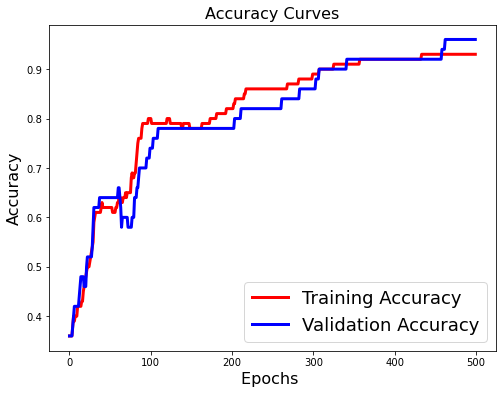

In [78]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(mlp_reg.history['accuracy'],'r',linewidth=3.0)
plt.plot(mlp_reg.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Using Genetic Algorithm

In [79]:
model_reg.weights

[<tf.Variable 'dense_2/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.7202505 ,  0.5926494 ,  0.50503737, -0.6147829 ,  0.3581751 ,
         -0.82614267, -0.42329085,  0.28306004,  0.45229578,  0.53983307],
        [ 0.7649076 , -0.5073449 , -0.48477638, -0.6323451 , -0.42061076,
          0.5301722 , -0.46725434, -0.5643262 ,  0.04588714, -0.37546408],
        [-0.46242273,  0.40983927,  0.79378116, -0.10553743, -0.5895394 ,
         -0.5122647 , -0.16027708, -0.19026482,  0.34814528,  0.7262806 ],
        [-0.70097065,  0.95310503,  1.0825311 ,  0.43162593, -0.3448212 ,
         -0.48590878,  0.33854613,  0.4627504 , -0.24397278, -0.19492158]],
       dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.27803952,  0.27993044,  0.11761756,  0.22166735,  0.62350225,
         0.33942944, -0.09269284,  0.44417045, -0.14426629,  0.3432306 ],
       dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(10, 3) dtype=float32, numpy=
 arra

In [80]:
# creating  population with random weights
population_size = 50
# W1 size(4,10)  ip-hidden
# W2 size (10,)  act hidden
# W3 size (10,3) hidden-output
# W4 size (3) output act

# generate this for 50 population
W1_shape = K.eval(model_reg.weights[0]).shape
W2_shape = K.eval(model_reg.weights[1]).shape
W3_shape = K.eval(model_reg.weights[2]).shape
W4_shape = K.eval(model_reg.weights[3]).shape

W1 =np.random.randn(W1_shape[0],W1_shape[1])
W2 =np.random.randn(W2_shape[0])
W3 =np.random.randn(W3_shape[0],W3_shape[1])
W4 =np.random.randn(W4_shape[0])


In [81]:
model_reg.weights

[<tf.Variable 'dense_2/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.7202505 ,  0.5926494 ,  0.50503737, -0.6147829 ,  0.3581751 ,
         -0.82614267, -0.42329085,  0.28306004,  0.45229578,  0.53983307],
        [ 0.7649076 , -0.5073449 , -0.48477638, -0.6323451 , -0.42061076,
          0.5301722 , -0.46725434, -0.5643262 ,  0.04588714, -0.37546408],
        [-0.46242273,  0.40983927,  0.79378116, -0.10553743, -0.5895394 ,
         -0.5122647 , -0.16027708, -0.19026482,  0.34814528,  0.7262806 ],
        [-0.70097065,  0.95310503,  1.0825311 ,  0.43162593, -0.3448212 ,
         -0.48590878,  0.33854613,  0.4627504 , -0.24397278, -0.19492158]],
       dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.27803952,  0.27993044,  0.11761756,  0.22166735,  0.62350225,
         0.33942944, -0.09269284,  0.44417045, -0.14426629,  0.3432306 ],
       dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(10, 3) dtype=float32, numpy=
 arra

In [82]:
print(W1)
print(W2)
print(W3)
print(W4)

[[ 0.85279711  0.60161722  1.16074482  0.07259892  1.03233783 -3.94029107
  -0.52596267  0.60255987  1.91491408  1.1767106 ]
 [ 1.74851531 -1.21056115  1.49651687  0.70148093 -0.11961832 -0.70685937
   0.9832651  -0.79091936  0.63587279  0.61503928]
 [ 1.24068059 -0.01005264  0.24945617 -1.55199644  0.85189361 -0.22266241
  -0.16611085 -0.31428157  0.29560923  1.29966842]
 [-1.52933941  0.45927253  0.81965027 -0.4868475   1.37275756 -1.29026481
  -0.44666688  0.99427551  2.22874413 -1.04352751]]
[ 0.80330064 -1.12439445 -0.64726986 -0.34897578  0.50033988  1.10062077
 -1.4824998   0.53873608  1.00553558 -0.72918838]
[[-1.00752209  1.30377021  0.02325511]
 [ 2.03915502  2.05043497  1.07158307]
 [-0.38934215 -1.62158984  0.61058981]
 [-2.07411117 -1.27193351  0.30685819]
 [ 1.03208749 -0.06447974  0.76598964]
 [ 0.12378633 -0.18789113  1.2616066 ]
 [ 1.47637728 -0.12624295 -2.16939794]
 [-0.92321683 -0.29596134  0.06080584]
 [ 0.33635075  1.53139277  0.27259317]
 [-0.18733125  1.70118471

In [83]:
class Gene:
    def __init__(self,W1_shape,W2_shape,W3_shape,W4_shape):
        self.W1 =np.random.randn(W1_shape[0],W1_shape[1])
        self.W2 =np.random.randn(W2_shape[0])
        self.W3 =np.random.randn(W3_shape[0],W3_shape[1])
        self.W4 =np.random.randn(W4_shape[0])
        
    def show_gene(self):
        print(self.W1)
        print(self.W2)
        print(self.W3)
        print(self.W4)
        

In [84]:
class genetic_algo:
    def __init__(self,pop_size):
        self.popualtion_size = pop_size
        self.gene = []
        self.fitness_score = {}
        
    # generate population
    def generate_population(self,W1_shape,W2_shape,W3_shape,W4_shape):
        for i in range(self.popualtion_size):
            self.gene.append(Gene(W1_shape,W2_shape,W3_shape,W4_shape))
    
    # set weight
    def set_model_weights(self,model1,W1,W2,W3,W4):
        model1.layers[0].set_weights([W1,W2])
        model1.layers[1].set_weights([W3,W4])
        return model1
        
    #Foward propagate function
    def forward_propagate(self,model,X_train,y_train):
        
        for pop in range(self.popualtion_size):
            model = self.set_model_weights(model,self.gene[pop].W1,self.gene[pop].W2,self.gene[pop].W3,self.gene[pop].W4)
            step=0
            total_loss = 0
            loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
            for x_batch_train, y_batch_train in zip(X_train,y_train):
                logits = model(x_batch_train.reshape(1,-1))
                y_true = y_batch_train
                count=0
                for i in range(len(y_true)):
                    if y_true[i]==1:
                        break
                    count+=1
                loss_value = loss_fn(count, logits)
                total_loss+=loss_value
                #print("Training loss at step %d: %.4f" % (step, float(loss_value)))
                step+=1
            avg_loss = total_loss/len(X_train)
            #print(" Gene %d: Average trainning loss is %f"%(pop,avg_loss))
            self.fitness_score[pop]=avg_loss
        return self.fitness_score
    
    #Natural_Selection
    def natural_selection(self,selection_percent,size):
        fitness = dict(sorted(self.fitness_score.items(), key=lambda item: item[1]))
        fitness_items = fitness.items()
        selection_range = int(selection_percent/100*size)
        selected_dict = list(fitness_items)[:selection_range]
        selected_dict = dict(selected_dict)
        return selected_dict # best genes are selected
    
    #breed and mutation
    def breed(self,parent1,parent2,max_mutation,mutation_rate):
        off_spring = Gene(parent1.W1.shape,parent1.W2.shape,parent1.W3.shape,parent1.W4.shape)
        
        if(random.randrange(0,max_mutation) > mutation_rate):
            off_spring.W1 = parent1.W1 if random.randrange(0,10) < 5 else parent2.W1
        else:
            off_spring.W1 = np.random.randn(parent1.W1.shape[0],parent1.W1.shape[1])
        
        if(random.randrange(0,max_mutation) > mutation_rate):
            off_spring.W2 = parent1.W2 if random.randrange(0,10) < 5 else parent2.W2
        else:
            off_spring.W2 = np.random.randn(parent1.W2.shape[0])
        
        if(random.randrange(0,max_mutation) > mutation_rate):
            off_spring.W3 = parent1.W3 if random.randrange(0,10) < 5 else parent2.W3
        else:
            off_spring.W3 = np.random.randn(parent1.W3.shape[0],parent1.W3.shape[1])
        
        if(random.randrange(0,max_mutation) > mutation_rate):
            off_spring.W4 = parent1.W4 if random.randrange(0,10) < 5 else parent2.W4
        else:
            off_spring.W4 = np.random.randn(parent1.W4.shape[0])
            
        return off_spring
       
    #CrossOver
    def cross_over(self,max_mutation,mutation_rate,selection_percent,size):
        Prev_gen_gene = self.gene.copy()
        self.gene.clear()
        #print("population of gene {}".format(len(Prev_gen_gene)))
        selected_dict = self.natural_selection(selection_percent,size)
        selected_dict = list(selected_dict)
        self.gene.append(Prev_gen_gene[selected_dict[0]])
        self.gene.append(Prev_gen_gene[selected_dict[1]])
        #loop 
        #print(len(selected_dict))
        print(selected_dict)
        for i in range(len(selected_dict)-1):# breed A with B and B with A
            off_spring1 = self.breed(Prev_gen_gene[selected_dict[i]],Prev_gen_gene[selected_dict[i+1]],max_mutation,mutation_rate)
            self.gene.append(off_spring1)
            off_spring2 = self.breed(Prev_gen_gene[selected_dict[i+1]],Prev_gen_gene[selected_dict[i]],max_mutation,mutation_rate)
            self.gene.append(off_spring2)
        self.gene = self.gene[:self.popualtion_size]
        
    

In [85]:
Population = genetic_algo(50)

In [86]:
Population.generate_population(W1_shape,W2_shape,W3_shape,W4_shape)

In [87]:
fitness = Population.forward_propagate(model_reg,X_train,y_train)

In [88]:
epoch=100
for i in range(epoch):
    print("GEN: %d"%(i))
    Population.cross_over(1000,40,50,50)
    fitness = Population.forward_propagate(model_reg,X_train,y_train)

GEN: 0
[37, 26, 7, 12, 35, 41, 49, 5, 47, 42, 0, 33, 23, 25, 22, 40, 18, 4, 43, 9, 3, 34, 2, 11, 10]
GEN: 1
[4, 12, 0, 1, 5, 6, 8, 2, 25, 14, 13, 21, 10, 30, 17, 40, 33, 24, 35, 27, 28, 16, 42, 34, 36]
GEN: 2
[15, 4, 0, 1, 16, 2, 3, 8, 9, 11, 20, 26, 13, 14, 27, 22, 30, 41, 28, 38, 46, 34, 35, 47, 36]
GEN: 3
[0, 26, 38, 39, 1, 5, 6, 9, 12, 13, 16, 17, 19, 36, 27, 4, 7, 2, 3, 42, 24, 20, 46, 10, 29]
GEN: 4
[0, 1, 2, 3, 4, 6, 7, 9, 8, 12, 13, 15, 16, 17, 32, 18, 19, 10, 22, 23, 24, 25, 26, 27, 33]
GEN: 5
[0, 1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 16, 20, 21, 23, 24, 25, 27, 26, 28, 29, 34, 30, 31, 32]
GEN: 6
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 26, 27, 30]
GEN: 7
[11, 0, 1, 2, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 28, 29, 30]
GEN: 8
[13, 19, 43, 0, 1, 2, 3, 5, 7, 10, 11, 12, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28]
GEN: 9
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 23, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26]


GEN: 82
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 28, 29]
GEN: 83
[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27]
GEN: 84
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28]
GEN: 85
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
GEN: 86
[0, 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 25, 27, 28, 29, 30, 31, 32]
GEN: 87
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
GEN: 88
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29]
GEN: 89
[0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28]
GEN: 90
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26]
GEN: 91
[0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 28, 29, 30]


In [91]:
fitness = dict(sorted(fitness.items(), key=lambda item: item[1]))

In [92]:
fitness

{0: <tf.Tensor: shape=(), dtype=float32, numpy=0.7000101>,
 1: <tf.Tensor: shape=(), dtype=float32, numpy=0.7000101>,
 2: <tf.Tensor: shape=(), dtype=float32, numpy=0.7000101>,
 3: <tf.Tensor: shape=(), dtype=float32, numpy=0.7000101>,
 5: <tf.Tensor: shape=(), dtype=float32, numpy=0.7000101>,
 7: <tf.Tensor: shape=(), dtype=float32, numpy=0.7000101>,
 8: <tf.Tensor: shape=(), dtype=float32, numpy=0.7000101>,
 9: <tf.Tensor: shape=(), dtype=float32, numpy=0.7000101>,
 10: <tf.Tensor: shape=(), dtype=float32, numpy=0.7000101>,
 11: <tf.Tensor: shape=(), dtype=float32, numpy=0.7000101>,
 12: <tf.Tensor: shape=(), dtype=float32, numpy=0.7000101>,
 13: <tf.Tensor: shape=(), dtype=float32, numpy=0.7000101>,
 14: <tf.Tensor: shape=(), dtype=float32, numpy=0.7000101>,
 15: <tf.Tensor: shape=(), dtype=float32, numpy=0.7000101>,
 16: <tf.Tensor: shape=(), dtype=float32, numpy=0.7000101>,
 17: <tf.Tensor: shape=(), dtype=float32, numpy=0.7000101>,
 20: <tf.Tensor: shape=(), dtype=float32, numpy=